In [5]:
#Import Libraries
import os

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
print(tf.__version__)
from PIL import Image
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pandas as pd
import zipfile

2.9.0-rc2


In [7]:
#Extract Zip Dataset to tmp path
data_zip = 'Brain-Tumor.zip' # local path of downloaded .zip file
zip_ref = zipfile.ZipFile(data_zip, 'r')
zip_ref.extractall('') #Extract
zip_ref.close()
os.listdir('brain-tumor')

['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor']

In [14]:
#Start Image Processing
encode = OneHotEncoder()
encode.fit([[0], [1], [2], [3]]) 
def brain(predict):
    if predict==0:
        return 'Glioma Tumor'
    elif predict==1:
        return 'Meningioma Tumor'
    elif predict==2:
        return 'No Tumor or Normal'
    else:
        return 'Pituitary Tumor'

In [15]:
#Image Processing - Glioma Tumor
data_img = [] # to include the resized image
paths_img = [] # to insert an image from the link directory
resp_img = [] # to insert an image according to the condition statement in def brain
for r, d, f in os.walk(r'brain-tumor/glioma_tumor'):
    for file in f:
        if '.jpg' in file:
            paths_img.append(os.path.join(r, file))

for path in paths_img:
    img = Image.open(path)
    z = img.resize((128,128))
    z = np.array(z)
    if(z.shape == (128,128,3)):
        data_img.append(np.array(z))
        resp_img.append(encode.transform([[0]]).toarray())

In [16]:
#Image Processing - Meningioma Tumor
paths_img = []
for r, d, f in os.walk(r'brain-tumor/meningioma_tumor'):
    for file in f:
        if '.jpg' in file:
            paths_img.append(os.path.join(r, file))

for path in paths_img:
    img = Image.open(path)
    z = img.resize((128,128))
    z = np.array(z)
    if(z.shape == (128,128,3)):
        data_img.append(np.array(z))
        resp_img.append(encode.transform([[1]]).toarray())

In [17]:
# Image Processing - No Tumor/Normal
paths_img = []
for r, d, f in os.walk(r'brain-tumor/no_tumor'):
    for file in f:
        if '.jpg' in file:
            paths_img.append(os.path.join(r, file))

for path in paths_img:
    img = Image.open(path)
    z = img.resize((128,128))
    z = np.array(z)
    if(z.shape == (128,128,3)):
        data_img.append(np.array(z))
        resp_img.append(encode.transform([[2]]).toarray())

In [18]:
#Image Processing - Pituitary Tumor
paths_img = []
for r, d, f in os.walk(r'brain-tumor/pituitary_tumor'):
    for file in f:
        if '.jpg' in file:
            paths_img.append(os.path.join(r, file))

for path in paths_img:
    img = Image.open(path)
    z = img.resize((128,128))
    z = np.array(z)
    if(z.shape == (128,128,3)):
        data_img.append(np.array(z))
        resp_img.append(encode.transform([[3]]).toarray())

In [19]:
data_img = np.array(data_img)
data_img.shape

(3265, 128, 128, 3)

In [20]:
resp_img = np.array(resp_img)
resp_img = resp_img.reshape(3265,4)

In [23]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [24]:
#Define Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), input_shape=(128, 128, 3), padding = 'same'))
model.add(Conv2D(32, kernel_size=(4, 4),  activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (4,4), activation ='relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (4,4), activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss = "categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      1568      
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      16416     
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)       

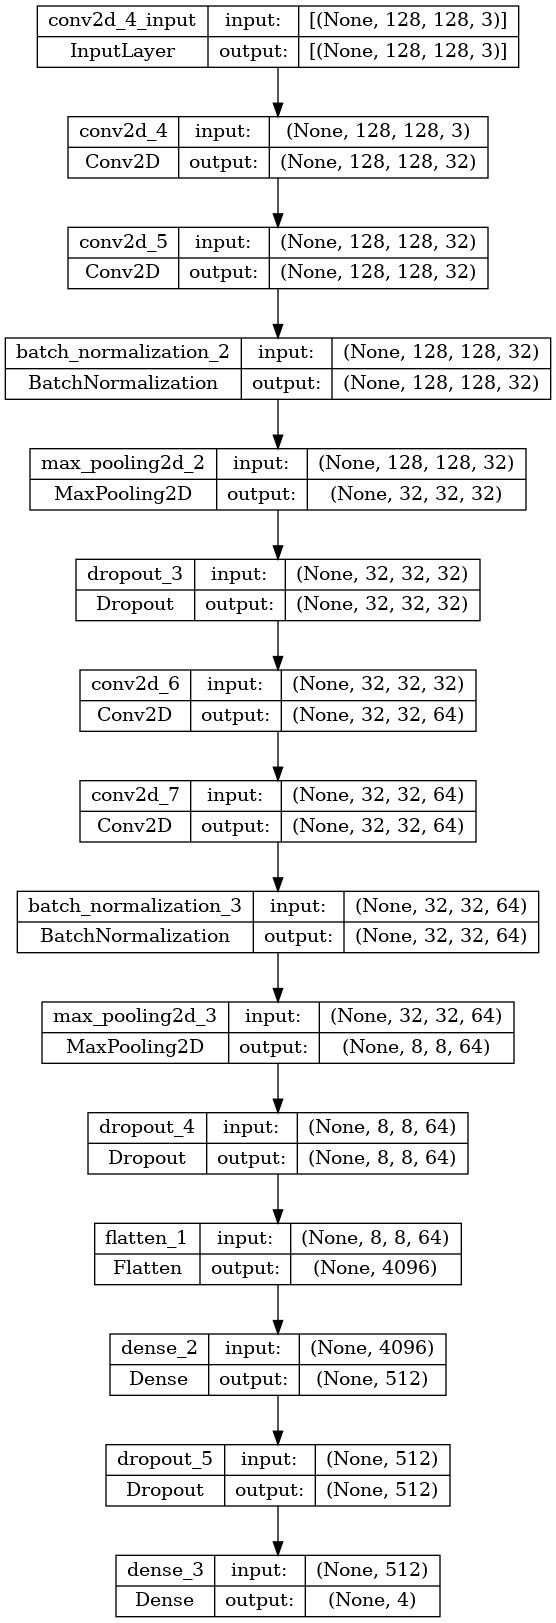

In [25]:
#Display PLot Model Training
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
#Split The Data Into Train and Test
train_x,test_x,train_y,test_y = train_test_split(
                                data_img, 
                                resp_img, 
                                shuffle=True,
                                test_size=0.2,  
                                random_state=69)

In [27]:
#Run Model
history = model.fit(
            train_x, 
            train_y, 
            epochs=100, 
            batch_size=64, 
            verbose=1,
            validation_data=(test_x, test_y))

Epoch 1/100
41/41 [==============================] - 121s 3s/step - loss: 3.8453 - accuracy: 0.4885 - val_loss: 11.2503 - val_accuracy: 0.2083
Epoch 2/100
41/41 [==============================] - 118s 3s/step - loss: 0.9293 - accuracy: 0.6413 - val_loss: 1.5721 - val_accuracy: 0.2665
Epoch 3/100
41/41 [==============================] - 119s 3s/step - loss: 0.7954 - accuracy: 0.6711 - val_loss: 1.0857 - val_accuracy: 0.4686
Epoch 4/100
41/41 [==============================] - 116s 3s/step - loss: 0.7571 - accuracy: 0.6845 - val_loss: 0.9679 - val_accuracy: 0.5482
Epoch 5/100
41/41 [==============================] - 115s 3s/step - loss: 0.6647 - accuracy: 0.7198 - val_loss: 0.8978 - val_accuracy: 0.5773
Epoch 6/100
41/41 [==============================] - 115s 3s/step - loss: 0.6124 - accuracy: 0.7347 - val_loss: 0.7238 - val_accuracy: 0.6325
Epoch 7/100
41/41 [==============================] - 115s 3s/step - loss: 0.5786 - accuracy: 0.7565 - val_loss: 0.6752 - val_accuracy: 0.7029
Epoch

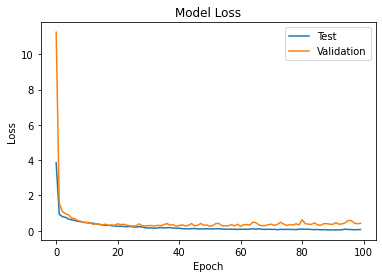

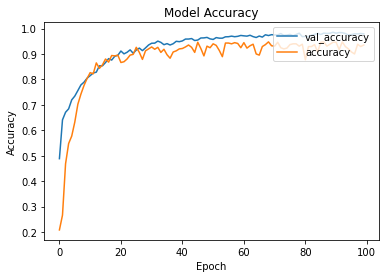

In [28]:
# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'accuracy'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 130ms/step
99.70728158950806% this is Glioma Tumor


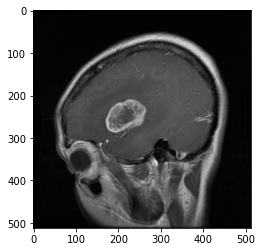

In [29]:
#Alternative predict without upload image
img = Image.open(r"/tmp/brain-tumor/glioma_tumor/gg (104).jpg")
a = np.array(img.resize((128,128)))
a = a.reshape(1,128,128,3)
x = model.predict(a)
classi = np.where(x == np.amax(x))[1][0]
imshow(img)
print(str(x[0][classi]*100) + '% this is ' + brain(classi))

In [31]:
#save model in hdf5 format
model.save("model.h5")

In [36]:
#evaluate the model
model.evaluate(test_x, test_y, batch_size=64 ,verbose=2)

11/11 - 6s - loss: 0.4176 - accuracy: 0.9357 - 6s/epoch - 520ms/step


[0.4175606071949005, 0.9356814622879028]

In [37]:
new_model = keras.models.load_model("model.h5")
new_model.evaluate(test_x, test_y, batch_size=64 ,verbose=2)

11/11 - 6s - loss: 0.4176 - accuracy: 0.9357 - 6s/epoch - 561ms/step


[0.4175606071949005, 0.9356814622879028]